The height of a leaking tank is defined by the following differential equation

$\frac{dh}{dt} = -26.56 \frac{A}{B} \sqrt{h}$ where $B$ is the cross-sectional area of the tank, and $A$ is the cross-sectional area of the hole where the leak occurs. The constant -26.56 has units of $\sqrt{(cm/s^2)}$.

In this equation,

Assuming that the tank is 2m in diameter, the hole is 1 cm in diameter, and the liquid level in the tank is initially at 2.25 m, our objective is to estimate when the tank will be empty.



### Analytical solution



This differential equation can be analytically solved by separation of variables and integration. Find an analytical solution and plot it. Solve this analytically to find the time when $h=0$.



### Integral solution



If you separate the variables in the differential equation, and then integrate both sides, the time integral will be trivial and you can then solve for the time to empty the tank by using the `quad` function to evaluate the integral on $h$ by setting the integral limits from the initial height to zero.



### Find a solution with solve_ivp



Compute and plot a solution to the ODE using scipy.integrate.solve\_ivp. Note that this problem is a little problematic as the height approaches zero. If there are any errors where the integration algorithm predicts that the height goes negative (the function approaches zero, and the derivative is negative, so this could happen), there is an error in the sqrt function and the integration terminates. Nevertheless, try this and plot your solution. Estimate the time to empty the tank based on your solution.



### Use a change of variables to fix the sqrt error



You can use a change of variables to solve the problem with the sqrt. Define a new variable $v = \sqrt{h}$. Use this to change the ODE into a new form based on $\frac{dv}{dt}$. Use this form with `solve_ivp` and an event to solve for the time where the tank is empty.



### Solution



This is separable, so you can work out:

$\int_{h0}{h}\frac{dH}{\sqrt{h}} = \int_0^t -26.56 \frac{A}{B} dt$

which leads to: $2h^{1/2} - 2h_0^{1/2} = -26.56 \frac{A}{B}  t$ or $h(t) = (h_0^{1/2} - 13 \frac{A}{B} t)^2$.



# Out [1]:
# output
0.000332

# text/plain

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

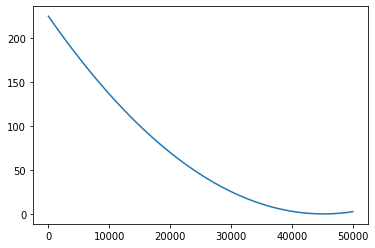

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

d1 = 1   # cm, hole diameter
A = np.pi * d1**2 / 4

d2 = 200 # cm, cylinder diamter
B = np.pi * d2**2 / 4


h0 = 225 # cm, initial height
print(26.56 / 2 * A / B)
t = np.linspace(0, 50000)
h = (np.sqrt(h0) - 26.56 / 2 * A / B * t)**2
plt.plot(t, h)

To get the time when h = 0: $0 = \sqrt{h0}  - 26.56 / 2 * A / B t$



In [1]:
t = -np.sqrt(h0) / (-26.56 / 2 * A / B)
print(f'The time to empty the tank is {t:1.0f} seconds.')

# Out [2]:
# output
The time to empty the tank is 45181 seconds.

In [1]:
def integrand(h):
    return 1 / np.sqrt(h)

from scipy.integrate import quad

I, err = quad(integrand, h0, 0)
I  * B / A / -26.56

# Out [3]:
# text/plain
45180.72289156624

# Out [4]:
# output
/Users/jkitchin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt


# text/plain
45180.736260076

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

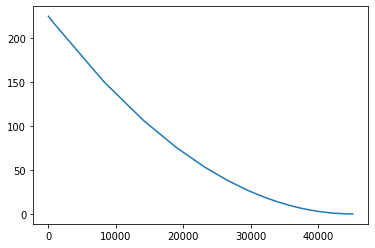

In [1]:
def ode(t, h):
    return -26.56 * A / B * np.sqrt(h)

from scipy.integrate import solve_ivp

sol = solve_ivp(ode, t_span=(0, 60000), y0=[h0])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y.T)
sol.t[-1]

In [1]:
def dvdt(t, v):
    return -26.56 * A / B / 2

def event(t, v):
    return v[0]

event.terminal = True

v0 = np.sqrt(h0)
sol = solve_ivp(dvdt, t_span=(0, 50000), y0=[v0], events=event)
sol

# Out [5]:
# text/plain
  message: 'A termination event occurred.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.00000000e+00, 8.53093092e-01, 9.38402402e+00, 9.46933333e+01,
       9.47786426e+02, 9.47871735e+03, 4.51807229e+04])
 t_events: [array([45180.72289157])]
        y: array([[ 1.50000000e+01,  1.49997168e+01,  1.49968845e+01,
         1.49685618e+01,  1.46853349e+01,  1.18530658e+01,
        -3.55271368e-15]])